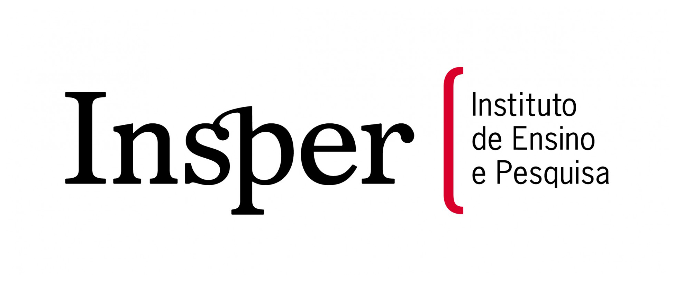

# Computação para Ciências dos Dados

<sub><a href="https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/">PÓS-GRADUAÇÃO EM DATA SCIENCE E DECISÃO</a></sub>

## Dica do Dia: 009

O objetivo desta dica do dia e explorar um pouco mais sobre geração de planilhas Excel/Calc, formatação e uma breve experiência artística com processamento de imagem.

> Todos os dias no período de contingência pelo Coronavirus (COVID-19) vamos enviar uma breve dica sobre Python para ciências dos dados em um jupyter notebook, conteúdo adicional ao curso que pode ser utilizado nos projetos

Os contadores trabalham com planilhas muito antes da inveção dos computadores.
As planilhas eletrônicas são <i>lingua franca</i> no mundo dos negócios, ler e gerar arquivos do Excel/Calc é fundamental nos projetos de ciências dos dados.

A [VisiCalc](https://pt.wikipedia.org/wiki/VisiCalc) foi a primeira planiha, criada em 1978, foi uma <i>killer application</i> que impulsionou a adoção de PCs pelas empresas, foi um dos fatores que possibiliou a transformação que temos hoje, para saber mais sobre essa história: http://www.dssresources.com/history/sshistory.html

Lembre se de aprender sobre os riscos de utilizar planilhas no ambiente corporativo:

- [Horror Stories - European Spreadsheet Risks Interest Group](http://www.eusprig.org/horror-stories.htm)
- [Spreadsheet Risks Still Being Ignored by C-Suite: Study - CFO](https://www.cfo.com/budgeting/2019/06/spreadsheet-risks-still-being-ignored-by-c-suite-study/)
- [Managing spreadsheet risks - PwC](https://www.pwc.com/gx/en/insurance/solvency-ii/pdf/pwc-countdown-june-11-managing-spreadsheet-risks.pdf)
- [Spreadsheet Risk - Warning Warning Spreadsheets in Use](https://theexcelclub.com/spreadsheet-risk/)
<div style="font-size:40px;text-align:right;">😱</div>
<br>

Instalação das bibliotecas que vamos utilizar

In [3]:
!pip install xlrd

In [196]:
!pip install pillow

Import das bibliotecas

In [205]:
from xlwt import Workbook
import xlwt
import random

Criar uma planilha e uma pasta, e incluir nas células os valores calculados...

In [206]:
#Cria um objeto com uma planilha nova
book = Workbook()

#Criar uma pasta na planilha
sheet1 = book.add_sheet('Pasta 1')

#Loop para criar o conteúdo, planilha de 20 x 20 com a sequência numérica
for linha in range(0, 20):
    for coluna in range(0, 20):
        sheet1.write(linha, coluna, (linha + 1) * (coluna + 1)) #linha, coluna, conteúdo

#Salva a planilha, na mesma pasta do notebook
book.save('planilha01.xls')

Note que no Excel/Calc a planilha inicia na linha __1__ e no código na linha **0** (ZERO)

> No ambiente Linux há disponível o LivreOffice com o programa de planilhas Calc (também em Mac e Windows), que é compatível com o Excel e consegue ler e gravar arquivos nos formatos xls e xlsx também, entre outros formatos.

O objeto string do Python 3.x tem uma ferramenta poderosa para formatar o texto chamado "format", para saber mais: https://docs.python.org/pt-br/3/tutorial/inputoutput.html

In [201]:
"Nome={};Valor={};Código:={}".format("Maria", 123.12, 42)

'Nome=Maria;Valor=123.12;Código:=42'

Neste exemplo estamos também incluindo texto para o título e fórmulas da planilha

In [207]:
book = Workbook()

#Criar uma pasta na planilha
sheet1 = book.add_sheet('Pasta 1')
maxlinha = 21

#Cabeçalho:
sheet1.write(0, 0, "#") #linha, coluna, conteúdo
sheet1.write(0, 1, "Quantidade")
sheet1.write(0, 2, "Valor")
sheet1.write(0, 3, "Total")
sheet1.write(0, 4, "Acumulado")

#Loop para criar o conteúdo, planilha de 20 x 20 com a sequência numérica
for linha in range(1, maxlinha):
    sheet1.write(linha, 0, linha) #linha, coluna, conteúdo
    sheet1.write(linha, 1, random.randint(1,100))
    sheet1.write(linha, 2, random.random()*1000) #linha, coluna, conteúdo
    sheet1.write(linha, 3, xlwt.Formula('B{}*C{}'.format(linha+1, linha+1)))
    
    if linha == 1:
        sheet1.write(linha, 4, xlwt.Formula('D2'))
    else:
        sheet1.write(linha, 4, xlwt.Formula('D{}+E{}'.format(linha+1, linha)))

#Rodapé, somatório final        
sheet1.write(maxlinha,0,"Total")
sheet1.write(maxlinha,1,xlwt.Formula('SUM(B2:B{})'.format(maxlinha)))
sheet1.write(maxlinha,2,xlwt.Formula('SUM(C2:C{})'.format(maxlinha)))
sheet1.write(maxlinha,3,xlwt.Formula('SUM(D2:D{})'.format(maxlinha)))
sheet1.write(maxlinha,4,xlwt.Formula('SUM(E2:E{})'.format(maxlinha)))

#Salva o arquivo
book.save('planilha02.xls')

**Atividade**: Copie o código assima e inclua formatação na planilha (cor, fonte, etc...) consultando a documentação

**Dica**: 

- Em data science só utlize planilha para transportar dados quanto inevitável, procurar utilizar outros formatos como JSON, XML, TSV, CSV, etc...
- Nunca fazer data science em VBA!!!

<div style="font-size:40px;text-align:right;">☠</div>

- Por outro lado você pode utilizar planilha para fazer **ARTE**!!!

<div style="font-size:40px;text-align:right;">👍</div>
<br>

In [208]:
book = Workbook()

sheet1 = book.add_sheet('Arte 1')

for i in range(0, 100):
    estilo = xlwt.easyxf('pattern: pattern solid;')
    estilo.pattern.pattern_fore_colour = i
    sheet1.write(i % 24, i // 24, i, estilo)  #linha, coluna, conteúdo, estilo

book.save('planilha03.xls') 

No exemplo a seguir, abra o arquivo planilha03.xlsx no Excel/Calc, selecione toda a planilha e escolha formatação condicional de cor por vador máximo 10 e mínimo -10, ajuste o tamanho das células horizontal para ficar pequeno...

In [209]:
import math

book = Workbook()

sheet1 = book.add_sheet('Arte 2')

r = 100;

for x in range(0, 100):
    for y in range(0, 100):
        sheet1.write(x, y, math.sin(x*r) * math.cos(y*r))

book.save('planilha04.xls') 

![Arte em planilha](planilha04.png)

Há outra biblioteca mais recente, interessante para trabalhar com planilhas versão mais atualizada para arquivo **xlsx**... com recursos mais avançados para formatação...

In [210]:
from xlsxwriter.workbook import Workbook

workbook = Workbook('planilha05.xlsx')
worksheet = workbook.add_worksheet('Pasta 1')

#Note que aqui podemos utilizar o endereço da célula na planilha
worksheet.write('A1', "Valores")
worksheet.write('A2', 19)
worksheet.write('A3', 51)
worksheet.write('A4', 20)
worksheet.write('A5', 120)
worksheet.write_formula('A6','SUM(A2:A5)')

format1 = workbook.add_format({'bold': 1, 'italic': 1, 'bg_color': "yellow"})
format2 = workbook.add_format({'color': 'red'})

worksheet.conditional_format('A1:A6', {'type': 'cell',
                                       'criteria': '>=',
                                       'value': 50,
                                       'format': format1})

worksheet.conditional_format('A1:A6', {'type': 'cell',
                                       'criteria': '=',
                                       'value': 20,
                                       'format': format2})
workbook.close()

Neste exemplo os valores são destacados pelas cores

In [211]:
workbook = Workbook('planilha06.xlsx')
worksheet = workbook.add_worksheet('Arte 3')

# Light red fill with dark red text.
format1 = workbook.add_format({'bg_color':   '#FFC7CE',
                               'font_color': '#9C0006'})

# Light yellow fill with dark yellow text.
format2 = workbook.add_format({'bg_color':   '#FFEB9C',
                               'font_color': '#9C6500'})

# Green fill with dark green text.
format3 = workbook.add_format({'bg_color':   '#C6EFCE',
                               'font_color': '#006100'})

worksheet.conditional_format('A1:CV100', {'type':     'cell',
                                        'criteria': '<=',
                                        'value':    0,
                                        'format':   format1})

worksheet.conditional_format('A1:CV100', {'type':     'cell',
                                        'criteria': '>',
                                        'value':    0,
                                        'format':   format3})

#E o format3?? Adicione este elemento no código e veja o resultado!

r = 100;

for x in range(0, r):
    for y in range(0, r):

        worksheet.write(x, y, r * (math.sin(x) * math.cos(y)))

workbook.close() 

Outra forma de destacar os dados com cores utilizando gradiente

In [212]:
workbook = Workbook('planilha07.xlsx')
worksheet = workbook.add_worksheet('Arte 4')

worksheet.conditional_format('A1:AN40', {'type': '2_color_scale'})

val = range(-20,20)

for x in range(len(val)):
    for y in range(len(val)):
        worksheet.write(x, y, (val[x]*val[y])**2) #Parabola
        
workbook.close() 

> Na Internet há WEB APIs (WEB Services) para tudo hoje em dia!!

Vamos utilizar uma WEB API que traz imagens do ator Bill Murray, você pode especificar o tamanho da imagem e se ela deve ser preto e branco, os parâmetros são passados na URL. Fonte: https://www.fillmurray.com

In [213]:
%%HTML
<img src="https://www.fillmurray.com/g/200/200"> <!-- gray scale image -->
<img src="https://www.fillmurray.com/100/100">
<img src="https://www.fillmurray.com/300/200">

Vamos agora transformar a imagem do Bill Murray em uma planilha e assim explorar as capacidades artísticas com planilhas Excel\Calc!

Importar as bibliotecas, carregar uma imagem 100x100, exibir a imagem para validação...

In [224]:
import requests
from IPython.display import Image as IPImage, display
from PIL import Image

In [222]:
response = requests.get("https://www.fillmurray.com/100/100")

In [223]:
response

<Response [200]>

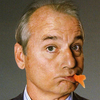

In [226]:
IPImage(response.content)

Obter e validar a imagem, note que não estamos salvando o arquivo, os dados são lidos na memória (variáveis) e processados...

In [227]:
r = requests.get("https://www.fillmurray.com/100/100", stream=True)
r.raw.decode_content = True # handle spurious Content-Encoding
im = Image.open(r.raw)

print(im.format, im.mode, im.size)

JPEG RGB (100, 100)


As imagens são compostas por pixels. Cada pixel é composto por 3 valores inteiros (números naturais), representando as cores RGB. Há diversas outras formas de representar cores computacionalmente.

As imagens tem duas dimenções 800x600, 1024x768, etc...

Desta forma uma imagem colorida consiste em uma matriz de por exemplo 800x600x3.

Processando os dados da imagem, transformando em um array/matriz 100x100 com tuplas de 3 valores inteiros RGB (números naturais).

In [181]:
pixels = list(im.getdata())
width, height = im.size

pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

In [189]:
len(pixels)

100

In [233]:
len(pixels[0])

100

In [234]:
pixels[0][0]

(53, 50, 43)

In [ ]:
pixels #long output

Função para converter as cores dos pixels recebidos em tuplas com 3 valores (RGB) decimais para o formato hexadecimal

- #FFFFFF ➔ Branco
- #000000 ➔ Preto
- #606060 ➔ Um tom de cinza
- #FF0000 ➔ Vermelho (R - Red)
- #00FF00 ➔ Verde (G - Green)
- #0000FF ➔ Azul (B - Blue)

In [183]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

In [185]:
rgb_to_hex((55,53,41))

'#373529'

In [235]:
rgb_to_hex(pixels[0][0])

'#35322b'

Aqui a mágica acontece!! 🧙

Vamos ler os dados das cores de cada pixel da imagem, converter para hexadecial e usar como fundo da células da planilha

In [195]:
workbook = Workbook('planilha08.xlsx')
worksheet = workbook.add_worksheet('Arte 5 - Bill Murray')

#Note que estamos usamdo uma imagem de 100 x 100 pixels
image_size=100;

for x in range(image_size):
    for y in range(image_size):
        cell_format = workbook.add_format({'bg_color': rgb_to_hex(pixels[x][y])}) #estilo
        worksheet.write(x, y, "", cell_format)
        
workbook.close() 

![Arte com planilha](planilha08.jpg)

> É assim que um cientista de dados utiliza planilhas!!!

Se você não gosta do [Bill Murray](https://pt.wikipedia.org/wiki/Bill_Murray), pode utilizar outra WEB API de imagens:

- Nicolas Cage: https://www.placecage.com/
- Gatinhos: https://thecatapi.com/
- Cachorrinhos: https://dog.ceo/dog-api/

Note que neste notebook estamos utilizando diversos icones 🤪, são caracteres unicode, formatamos usando HTML e CSS no markdown.

```html
<div style="font-size:40px;text-align:right;">🤠</div>
```

ou

```html
<em style="font-size:40px;text-align:right;">😎</em>
```

Você pode buscar estes icones (caracteres) nas tabelas UNICODE e colar no texto, ou utilizar os códigos. O browser renderiza diversos caracteres UNICODE como icones.  

**Atividade**: Crie uma planilha 20x20 com números aleatórios. Crie uma planilha com uma imagem bitmap (0 e 1) e utilize formatação condicional para gerar visual colorido

Quando buscar por dicas na Internet, verifique qual a biblioteca que está sendo utilizada __xlrd__ ou **xlswriter** na documentação ou forum.

Para saber mais:

- https://xlrd.readthedocs.io/en/latest/
- https://xlsxwriter.readthedocs.io/#
- https://www.geeksforgeeks.org/writing-excel-sheet-using-python/
- https://en.wikipedia.org/wiki/Digital_image
- https://unicode.org/emoji/charts/full-emoji-list.html
- https://unicode-table.com/pt/
- https://unicode-table.com/pt/sets/arrow-symbols/

PS: Você pode impressionar a pessoa amada com um único e exclusivo <i>portrait</i> em planilha

🤡